# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 10



**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 20 баллов
* Задача 4 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 5 &mdash; 30 баллов
* Задача 6 &mdash; 35 баллов

-----

In [180]:
# Bot check

# HW_ID: phds_hw10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [181]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from tqdm import tqdm

### <b><font color="blue">Легкая часть</font></b>
### Задача 1

Проверьте, отличается ли средний балл студентов курса Phystech@DataScience за легкую часть задания 3 и 6 весной 2024.

Данные возьмите из [таблицы оценок](https://docs.google.com/spreadsheets/d/1CTOvQrxRpGEJG5vOIVYSPBfUzON5MAsnZeAUj3xxzFA/edit?usp=sharing). Не забудьте визуализировать данные с помощью ядерной оценки плотности (вам поможет функция `sns.kdeplot`) и оценить сдвиг.



In [182]:
def to_int(arr):
    for i, mark in enumerate(arr):
        if isinstance(mark, str):
            for symb in mark:
                if not symb.isdigit():
                    arr[i] = mark.split(symb)[0]
    return np.array(list(map(int, arr)))

In [183]:
data = pd.read_excel('./Успеваемость Ph@DS 2024.xlsx',sheet_name='Домашние задания')
df = data[['ДЗ 3', 'ДЗ 6']]
df = df.drop([0, 1])
df.iloc[165]['ДЗ 6'] = 32.5

In [184]:
task3 = df['ДЗ 3'].values
task6 = to_int(df['ДЗ 6'].values)

<Axes: ylabel='Density'>

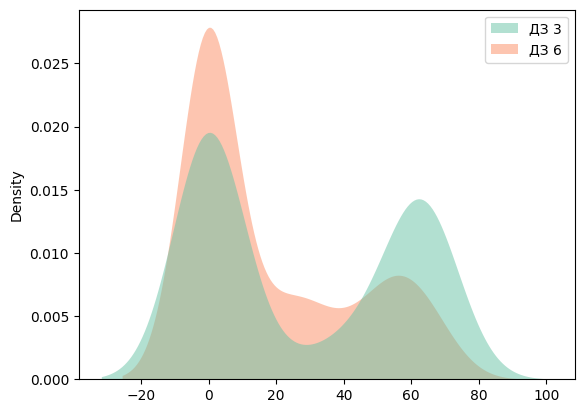

In [185]:
sns.kdeplot(data=df, fill=True, common_norm=False, palette="Set2", alpha=0.5, linewidth=0)

По графику видно, что распределение оценок по задачам далеки от нормальных. На глаз кажется, что средние отличаются

Убедимся в этом. $H_0$ -- данные даспределены нормально

In [186]:
print(f'p_val for h_0 for task 3{sps.shapiro(task3).pvalue}')
print(f'p_val for h_0 for task 6{sps.shapiro(task6).pvalue}')

p_val for h_0 for task 33.380388054994725e-17
p_val for h_0 for task 69.415941834734433e-17


Очевидно, гипотеза отвергается

Выведем эти средние по выборкам

In [187]:
print(f'mean for task 3: {round(task3.mean(), 2):.2f}')
print(f'mean for task 6: {round(task6.mean(), 2):.2f}')

mean for task 3: 27.80
mean for task 6: 17.94


Глаз не подвёл

Также видно, что данные пришли, скорее всего из разных распределений. Давайте проверим это

In [188]:
sps.ks_2samp(task3, task6)

KstestResult(statistic=0.24581005586592178, pvalue=3.705779639761674e-05, statistic_location=59, statistic_sign=-1)

Как видим, гипотеза об одинаковости распределений хорошо отвергается

In [189]:
sps.ks_2samp(task3, task6, alternative='less')

KstestResult(statistic=0.24581005586592178, pvalue=1.852889819880839e-05, statistic_location=59, statistic_sign=-1)

In [190]:
sps.ks_2samp(task3, task6, alternative='greater')

KstestResult(statistic=0.0111731843575419, pvalue=0.9779619398403929, statistic_location=65, statistic_sign=1)

Критерий Колмогорова показывает, что стоит отвергнуть гипотезу о том, что $\Phi_{task6} >= \Phi_{task3}$

Однако вспомним, что выборки наши, на самом деле не независимые, ведь 'ботаны' будут решать задачки в среднем лучше, чем 'раздолбы'.

Попробуем вычесть столбцы и построим яоп для распределения полученной величины

In [191]:
D = task3 - task6

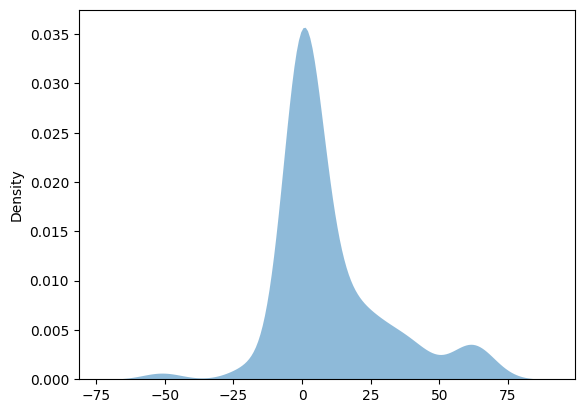

In [192]:
sns.kdeplot(data=df['ДЗ 3'] - df['ДЗ 6'], fill=True, common_norm=False, alpha=0.5, linewidth=0)
plt.show()

Проверим его на нормальность

In [193]:
print(f'p_val for h_0 for difference: {sps.shapiro(D).pvalue}')

p_val for h_0 for difference: 4.124716298630751e-15


Разности распределены ненормально, поэтому воспользуемся критерием Уилкоксона для проверки гипотезы о симметричности нашего распределения с правосторонней альтернативой

In [194]:
print(f'p_val: {sps.wilcoxon(D, alternative="greater").pvalue}')

p_val: 4.554948828554698e-11


Видим, что гипотезу стоит отвергнуть, то есть наше распределение несимметрично 'в правую сторону'. Видимо, отсюда можно сделать вывод, что средняя разность больше 0, то есть, что средняя оценка за 3-ю задачу больше, чем за 6-ю.

Сделайте общий вывод по задаче.

**Вывод:** Видимо, домашка 6 была посложнее, чем 3я)

Также, заметно, что есть куча нулей, от которых, на самом деле, хотелось бы избавиться, потому что это просто не сдавшие студенты, которые портят статистику. Также по гистограммам видно, что за 6у домашку было по большому счёту 2 оценки (2 горба распределения), распределение каждой из которых похоже на нормальное (это утверждение, впрочем, требует проверки)

### Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Сделайте выводы.

**Вывод:**

### Задача 3


Предположим, что вы разработали лекарство от коронавируса. Перед применением оно обязательно должно пройти клинические испытания. Для начала было разрешено проверить лекарство на двух независимых группах по 10 человек. Одна группа принимает плацебо, другая &mdash; ваш препарат. Большее количество пациентов на первом этапе брать не разрешают &mdash; слишком велики риски отрицательного результата.

Для каждого пациента измерялось количество дней от приема препарата до выздоровления. Получились следуюшие результаты:

In [195]:
x = [6, 16, 8, 13, 9, 4, 7, 10, 3, 14]  # плацебо
y = [5, 10, 3, 1, 5, 3, 19, 2, 2, 5]  # лекарство

Что вы можете сказать на основе этих результатов?
* Лекарство эффективнее, подтверждается статистическими методами;
* Наверное, лекарство эффективнее, но статистическими методами это пока не подтверждено, нужно продолжить эксперимент. Подумайте, как обосновать необходимость продолжение эксперимента;
* По результатам эксперимента нельзя сделать какой-либо вывод. Стоит ли продолжать эксперименты? Если да, то четко это обоснуйте;
* Лекарство неэффективно, нужно немедленно прекращать эксперимент.

Посмотрим на распределение времён выздоровления

<Axes: ylabel='Density'>

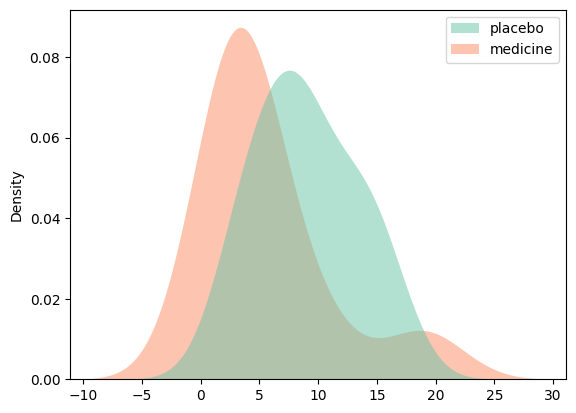

In [196]:
df = pd.DataFrame({'placebo': x, 'medicine': y})
sns.kdeplot(data=df, fill=True, common_norm=False, palette="Set2", alpha=0.5, linewidth=0)

Тут я вижу два варианта. Во-первых, опять таки можно воспользоваться критерием Уилкоксона, ведь выборки очевидно зависимые, а во-вторых можно попробовать что-то с бутстрепом

Критерий Уилкоксона

In [197]:
d = np.array(x) - np.array(y)
print(f'p_val: {sps.wilcoxon(d, alternative="greater").pvalue}')

p_val: 0.0419921875


Не очень уверено, но отвергаем в пользу правосторонней альтернативы. Видим, что лекарство всё-таки помогает. 

Бутстреп

Нагенерируем выборки разностей

In [198]:
def bootstrap_samples(sample, B):
    return np.random.choice(sample, size=(B, len(sample)), replace=True)

In [199]:
B = 100000

x_b = bootstrap_samples(np.array(x), B)
y_b = bootstrap_samples(np.array(y), B)

In [200]:
avg_x_b = x_b.mean(axis=1)
avg_y_b = y_b.mean(axis=1)

In [201]:
m = avg_x_b.mean()
v = avg_x_b.var()

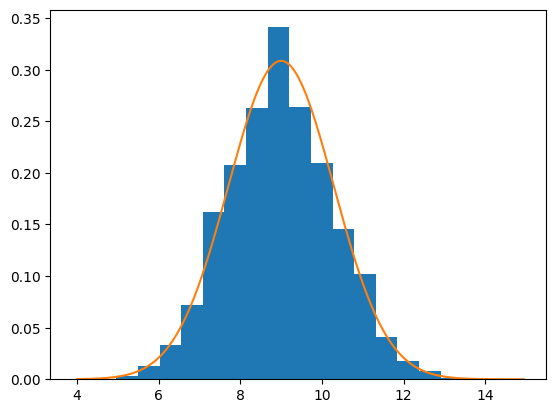

c:\Users\Dima\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9991542100906372, pvalue=4.00103998805889e-20)

In [202]:
plt.hist(avg_x_b, density=True, bins=20)
plt.plot(np.arange(4, 15, 0.05), sps.norm.pdf(np.arange(4, 15, 0.05), loc=m, scale=v ** 0.5))
plt.show()

sps.shapiro(avg_x_b)

In [203]:
sps.ks_1samp(avg_x_b, sps.norm(loc=m, scale=v ** 0.5).cdf)

KstestResult(statistic=0.020896967590099347, pvalue=2.299090248600514e-38, statistic_location=8.6, statistic_sign=1)

In [204]:
sps.anderson(avg_x_b)

AndersonResult(statistic=32.25100012020266, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.998999, scale=1.2927201589103083)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

В общем, как ни посмотри, данные не нормальны

Оценим по этим выборкам эти средние и построим для них бутстрепные доверительные интервалы

In [205]:
import math

In [206]:
(
    2 * np.array(x).mean() - sorted(avg_x_b)[math.ceil(B * (1 + 0.05) / 2)],
    2 * np.array(x).mean() - sorted(avg_x_b)[int(B * (1 - 0.05) / 2)],
)

(8.9, 9.1)

In [207]:
(
    2 * np.array(y).mean() - sorted(avg_y_b)[math.ceil(B * (1 + 0.05) / 2)],
    2 * np.array(y).mean() - sorted(avg_y_b)[int(B * (1 - 0.05) / 2)],
)

(5.6, 5.8)

Видим, что бутстрепные интервалы для оценок средних не пересекаются, то есть гипотезу о равенстве средних нужно отвергнуть. То есть эффект действительно есть.

Я считаю, что на этой выборке видно, что присутствует положительный эффект нашего лекарства, однако, объём выборки мал и результаты исследований ненадёжны (отвержение не слишком уверенное), поэтому эксперимент следует продолжать. Тем более, что по выборке видно, что был какой-то пациент, который выздоравливал аномально долго даже с нашим лекарством, и неясно, это побочка от лекарства или просто этот пациент плохо переносит ковид. В любом случае, пациентам точно не становится хуже от нашей таблетки

### Задача 4

Пусть $X=(X_1, \dots, X_n)$, $Y=(Y_1, \dots, Y_m)$ - независимые выборки из нормального распределения.

* $X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$,

* $Y_1, ..., Y_m \sim \mathcal{N}(a_2, \sigma_2^2)$.

C помощью t-test проверяется пара гипотез

$$\mathsf{H}_0\colon EX_1 = 0 \text{ vs } \mathsf{H}_1\colon EX_1 < 0$$

$$\mathsf{H}_0\colon EY_1 = 0 \text{ vs } \mathsf{H}_1\colon EY_1 > 0$$

Оцените реальный уровень значимости процедуры, если обе гипотезы проверяются на уровне $\alpha=0.05$. Совпадает ли он с $\alpha$? Предложите способ сделать так, чтобы он был равен $\alpha$.

Оценим реальный уровень значимости (конечно, сразу можно заподозрить тут МПГ)

In [208]:
a1 = 0
a2 = 0
sigma1 = 3
sigma2 = 3

sample_size_x = 100
sample_size_y = 50
sample_count = 10000

X = sps.norm.rvs(size=(sample_count, sample_size_x), loc=a1, scale=sigma1)
Y = sps.norm.rvs(size=(sample_count, sample_size_y), loc=a2, scale=sigma2)

In [209]:
def real_conf_level(X, Y):
    rejected = 0
    
    for x, y in zip(X, Y):
        p_val_x = sps.ttest_1samp(a=x, popmean=0, alternative='less').pvalue
        p_val_y = sps.ttest_1samp(a=y, popmean=0, alternative='greater').pvalue
        if p_val_x < 0.05 or p_val_y < 0.05:
            rejected += 1
    
    return rejected / len(X)

In [210]:
real_conf_level(X, Y)

0.1002

Ну, мы накапили ошибку первого рода как и в прошлом семинаре. Воспользуемся поправко Бонферони

In [211]:
def real_conf_level(X, Y):
    rejected = 0
    
    for x, y in zip(X, Y):
        p_val_x = sps.ttest_1samp(a=x, popmean=0, alternative='less').pvalue
        p_val_y = sps.ttest_1samp(a=y, popmean=0, alternative='greater').pvalue
        if p_val_x < 0.05 / 2 or p_val_y < 0.05 / 2:
            rejected += 1
    
    return rejected / len(X)

In [212]:
real_conf_level(X, Y)

0.0504

Ну вот, так получше.

Если честно, у меня ощущение, что я неправильно понял задание, но как-то уж очень плохо оно сформуллировано

### <b><font color="orange">Сложная часть</font></b>

### Задача 5


#### Профиль физика

Скачайте [данные](https://www.kaggle.com/datasets/naharrison/particle-identification-from-detector-responses?resource=download) моделирования неупругого рассеяния протонов и электронов. В датасете представлены 4 разных вида частиц (частицы одного вида имеют одинаковый id).

In [213]:
path = 'pid-5M.csv'
data = pd.read_csv(path)
data['id'].unique()

array([ 211, 2212,  321,  -11], dtype=int64)

Постройте гистограммы признаков для каждого вида частиц.

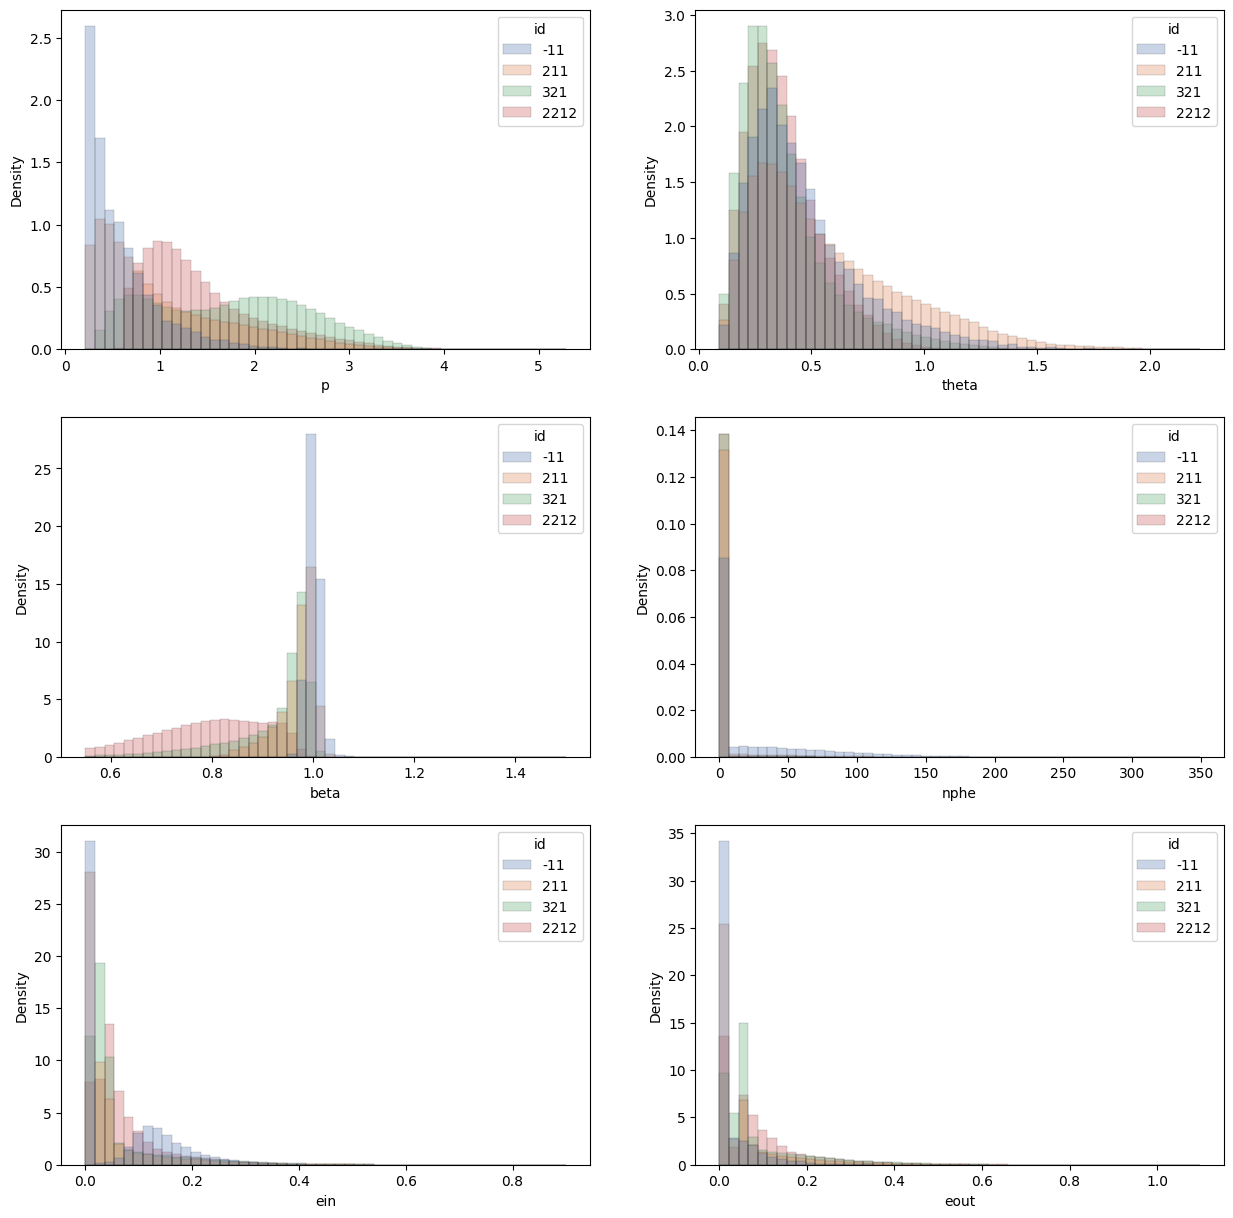

In [214]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for ax, clmn in zip(axes.flatten(), data.columns[1:]):
    sns.histplot(
        ax=ax,
        data=data,
        x=clmn,
        hue="id",
        bins=50,
        stat="density",
        common_norm=False,
        alpha=0.3,
        linewidth=0.1,
        palette="deep",
    )

Посмотрим также на паирплоты

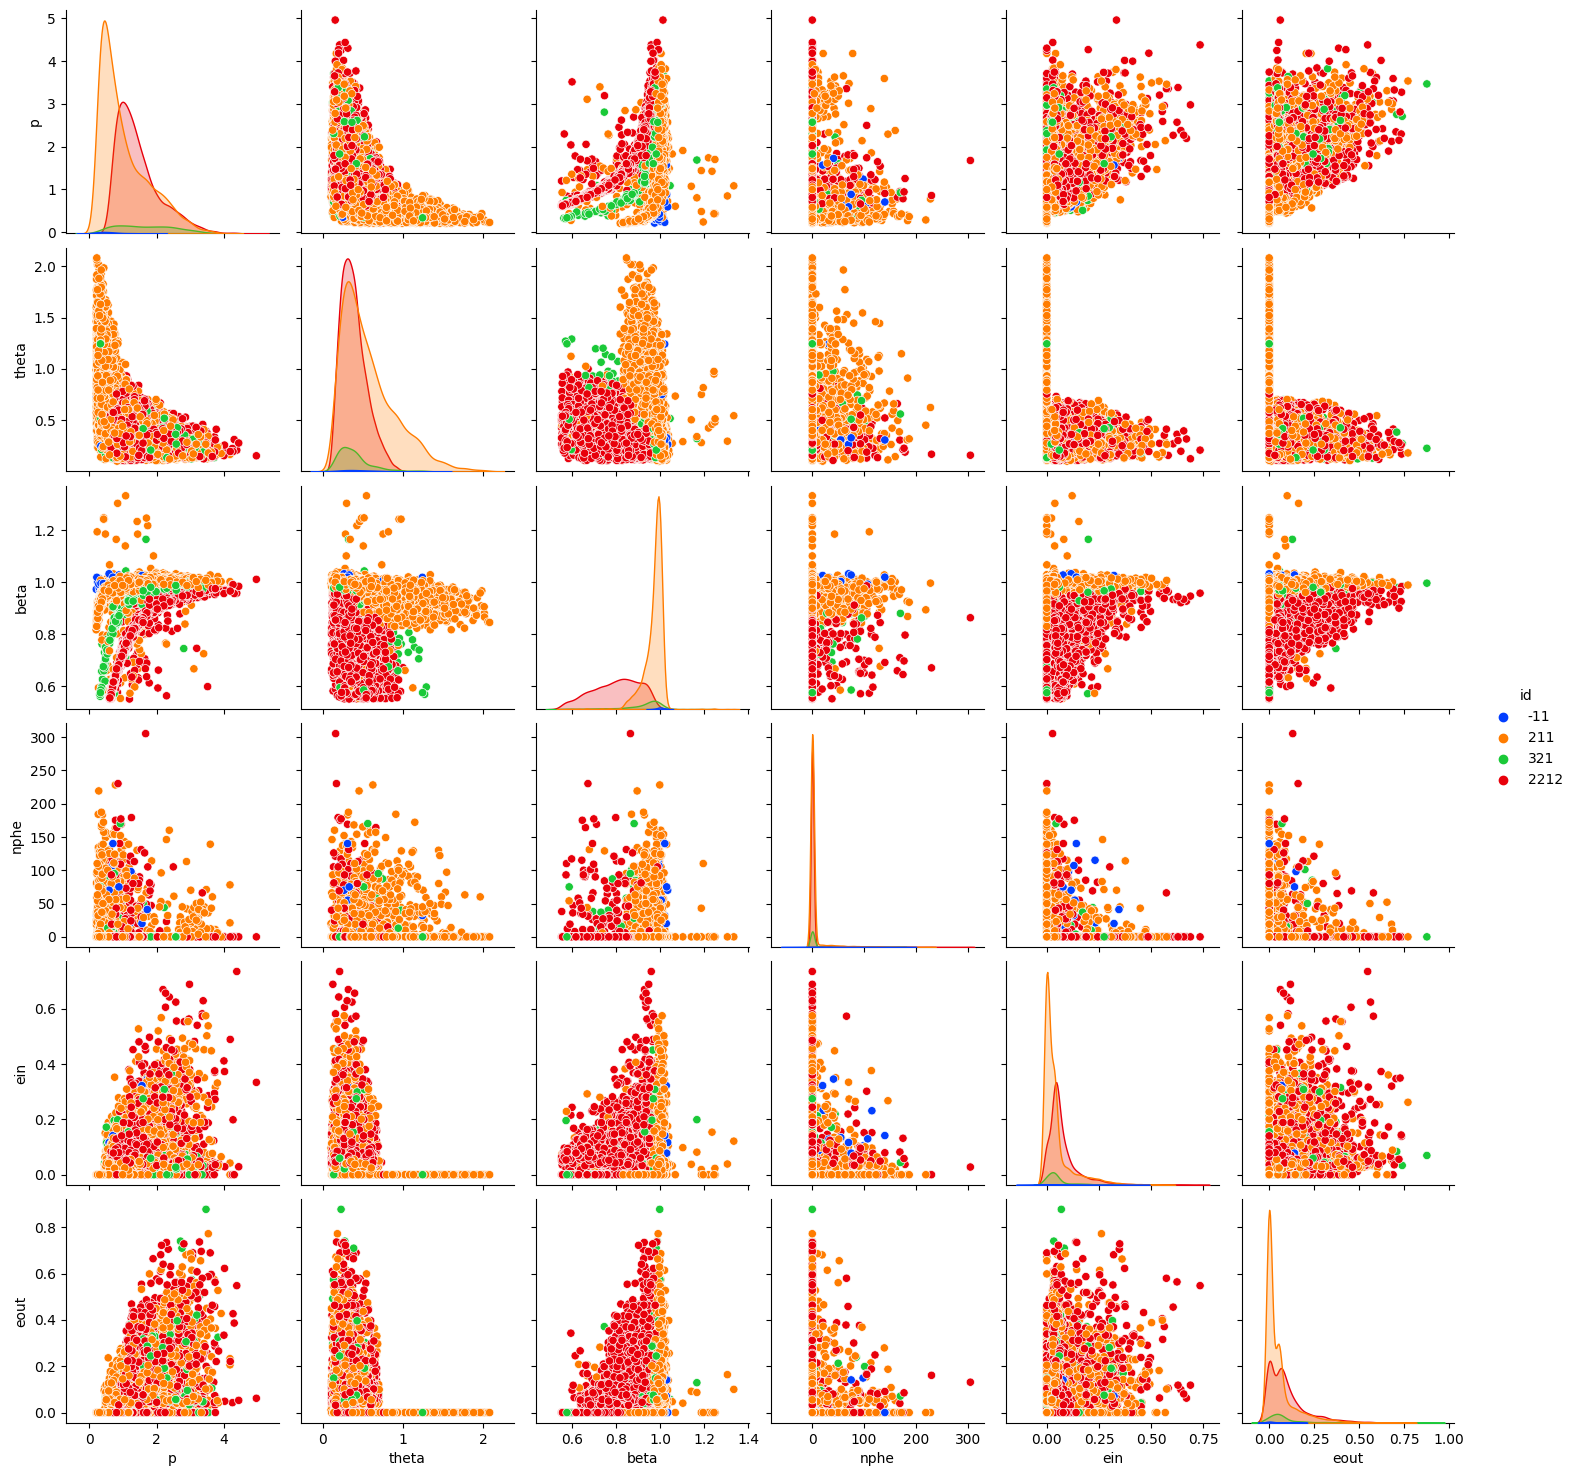

In [215]:
sns.pairplot(data=data.sample(frac=0.002), hue='id', palette='bright')

Для каждой частицы посчитайте среднее значение для каждой колонки с помощью `data.groupby`

In [216]:
data.groupby(by='id').mean()

,p,theta,beta,nphe,ein,eout
id,,,,,,
-11,0.591886,0.471277,1.001011,26.177948,0.068000,0.021495
211,1.035184,0.574035,0.968695,4.636706,0.042600,0.052250
321,1.744734,0.381561,0.921961,2.001605,0.060969,0.088638
2212,1.454526,0.379136,0.796434,2.059655,0.075566,0.094600


Для частиц и признаков с похожими средними значениями с помощью критерия Стьюдента проверьте гипотезу о равенстве средних. Не забудьте о МПГ.

Также посчитайте реализацию доверительного интервала величины сдвига. Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?


Похожими выглядят

theta:

    для 321 и 2212

In [217]:
sps.ttest_ind(data[data['id'] == 321]['theta'], data[data['id'] == 2212]['theta'])

Ttest_indResult(statistic=6.576689754354645, pvalue=4.8114502539498863e-11)

Отвергаем

Я не понял, что такое величина сдвига, но буду считать, что это разница средних

Также, я что-то не смог понять, почему ту должна быть $1 - \alpha$, а не $\alpha$, но так работает, а по-другому -- нет

In [218]:
def bootstrap_conf_int(estimation, bootstrap_ests, B=100, alpha=0.95):
    
    return (
        round(2 * estimation - sorted(bootstrap_ests)[math.ceil(B * (1 + alpha) / 2)], 4),
        round(2 * estimation - sorted(bootstrap_ests)[int(B * (1 - alpha) / 2)], 4),
    )

In [219]:
B = 100

beta:

    для -11 и 211 и 321

In [220]:
sps.ttest_ind(data[data['id'] == -11]['beta'], data[data['id'] == 211]['beta'])

Ttest_indResult(statistic=86.05838671520362, pvalue=0.0)

In [221]:
id1 = -11
id2 = 211
feature = 'beta'

ci = bootstrap_conf_int(
    data[data.id == id1][feature].mean() - data[data.id == id2][feature].mean(),
    bootstrap_samples(data[data.id == id1][feature], B).mean(axis=1)
    - bootstrap_samples(data[data.id == id2][feature], B).mean(axis=1),
    B,
)
print(f'Бутстрепный интервал для сдвига средних исследуемых частиц: {ci}')

Бутстрепный интервал для сдвига средних исследуемых частиц: (0.0319, 0.0327)


Отвергаем

In [222]:
sps.ttest_ind(data[data['id'] == 211]['beta'], data[data['id'] == 321]['beta'])

Ttest_indResult(statistic=430.1984838249898, pvalue=0.0)

In [223]:
id1 = 211
id2 = 321

ci = bootstrap_conf_int(
    data[data.id == id1][feature].mean() - data[data.id == id2][feature].mean(),
    bootstrap_samples(data[data.id == id1][feature], B).mean(axis=1)
    - bootstrap_samples(data[data.id == id2][feature], B).mean(axis=1),
    B,
)
print(f'Бутстрепный интервал для сдвига средних исследуемых частиц: {ci}')

Бутстрепный интервал для сдвига средних исследуемых частиц: (0.0463, 0.0471)


Отвергаем

nphe:

    для 321 и 2212

In [224]:
sps.ttest_ind(data[data['id'] == 321]['nphe'], data[data['id'] == 2212]['nphe'])

Ttest_indResult(statistic=-1.8877608654933322, pvalue=0.05905819391918882)

In [225]:
id1 = 2212
id2 = 321
feature = 'nphe'

ci = bootstrap_conf_int(
    data[data.id == id1][feature].mean() - data[data.id == id2][feature].mean(),
    bootstrap_samples(data[data.id == id1][feature], B).mean(axis=1)
    - bootstrap_samples(data[data.id == id2][feature], B).mean(axis=1),
    B,
)
print(f'Бутстрепный интервал для сдвига средних исследуемых частиц: {ci}')

Бутстрепный интервал для сдвига средних исследуемых частиц: (-0.0138, 0.1006)


Ну вот, по-любому где-то ошибся, по-идее, здесь нуль должен попадать в этот интервал

Оставляем

ein:

    для -11 и 321 и 2212

In [226]:
sps.ttest_ind(data[data['id'] == -11]['ein'], data[data['id'] == 321]['ein'])

Ttest_indResult(statistic=9.71842720996228, pvalue=2.5396514233341515e-22)

In [227]:
id1 = -11
id2 = 321
feature = 'ein'

ci = bootstrap_conf_int(
    data[data.id == id1][feature].mean() - data[data.id == id2][feature].mean(),
    bootstrap_samples(data[data.id == id1][feature], B).mean(axis=1)
    - bootstrap_samples(data[data.id == id2][feature], B).mean(axis=1),
    B,
)
print(f'Бутстрепный интервал для сдвига средних исследуемых частиц: {ci}')

Бутстрепный интервал для сдвига средних исследуемых частиц: (0.0056, 0.0087)


Отвергаем

In [228]:
sps.ttest_ind(data[data['id'] == 321]['ein'], data[data['id'] == 2212]['ein'])

Ttest_indResult(statistic=-83.29630120180293, pvalue=0.0)

In [229]:
ci = bootstrap_conf_int(
    data[data.id == id1][feature].mean() - data[data.id == id2][feature].mean(),
    bootstrap_samples(data[data.id == id1][feature], B).mean(axis=1)
    - bootstrap_samples(data[data.id == id2][feature], B).mean(axis=1),
    B,
)
print(f'Бутстрепный интервал для сдвига средних исследуемых частиц: {ci}')

Бутстрепный интервал для сдвига средних исследуемых частиц: (0.0056, 0.0089)


Отвергаем

eout:

    для 321 и 2212

In [230]:
sps.ttest_ind(data[data['id'] == 321]['eout'], data[data['id'] == 2212]['eout'])

Ttest_indResult(statistic=-24.611714817299653, pvalue=9.872296629356852e-134)

In [231]:
id1 = 2212
id2 = 321
feature = 'eout'

ci = bootstrap_conf_int(
    data[data.id == id1][feature].mean() - data[data.id == id2][feature].mean(),
    bootstrap_samples(data[data.id == id1][feature], B).mean(axis=1)
    - bootstrap_samples(data[data.id == id2][feature], B).mean(axis=1),
    B,
)
print(f'Бутстрепный интервал для сдвига средних исследуемых частиц: {ci}')

Бутстрепный интервал для сдвига средних исследуемых частиц: (0.0054, 0.0064)


Отвергаем

Видимо, я где-то неправ, слишком много отвергли)

Если честно, я не понял, где тут МПГ, ведь никакой реальный уровень значимости оценивать не требуется... И не понимаю, почему мы тут пользуемся критерием Стьюдента, если данные ну совсем не нормально распределены

**Ответ:** Видимо, я как-то не так понял это задание или что-то не то сделал, но не отвергли мы только одну гипотезу. Видим, что оба подхода -- t-тест и бутстрепные интервалы -- позволяют отвергнуть гипотезу и дают одинаковые результаты

Сделайте вывод, по каким измерениям частицы тяжелее/проще всего различить.

**Вывод:** Подводя итоги, кажется, что проще всего частицы различать по импульсу, а тяжелее всего, соответственно, по числу фотоэлектронов, оно там почти одинаково



### Задача 6

Это задание является продолжением задачи 5 из прошлого домашнего задания. Здесь вам необходимо наглядно сравнить два критерия из предыдущей задачи. Для этого прооделайте все пункты для обоих критериев. Обязательно подписывайте какой график к какому критерию относится.


**1.** **Оцените реальный уровень значимости** критерия для размеров выборки $1 \leqslant n \leqslant 50$ и визуализируйте полученную зависимость.

In [232]:
...

Ellipsis

**Вывод:**...

**2.** Для значений $n \in \{5, 15, 30, 50, 100\}$ **оцените функцию мощности критерия** для значений $\theta \in (0, 5)$ по сетке с шагом 0.25 по методу Монте-Карло. Визуализируйте полученные зависимости. Посчитайте также мощность критерия по асимптотической формуле, полученной на лекции, и сравните с оценкой мощности методом Монте-Карло. Учтите, что асимптотическая формула содержит $n$, поэтому для нее тоже должно быть три зависимости.

In [233]:
...

Ellipsis

**Вывод:**...

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta \in (0, 5)$ по сетке с шагом 0.25.

In [234]:
...

Ellipsis

**Вывод:**...

Сделайте общий вывод по сравнению двух критериев.

**Вывод:**